<a href="https://colab.research.google.com/github/thedeenun/weather-prediction/blob/main/Weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ลักษณะของกลุ่มข้อมูล (Data Description)
หัวข้อ Weather History Data จาก https://www.visualcrossing.com ซึ่งเป็นข้อมูลที่มีเนื้อหาเกี่ยวกับข้อมูลสภาพอากาศของกรุงเทพมหานครในช่วงเวลาตั้งแต่ 01/01/2019 ถึง 31/08/2021 

โดย Data set ที่เลือกมา มีลักษณะดังนี้

* Data set characteristic : Multivariate
* Attribute characteristic : Real, Nominal, Data-time
* ไม่มี missing values
* จำนวน Instance: 243
* จำนวน Attribute: 17 ดังนี้
  1. Name : ชื่อสถานที่
  2. Date time : วันที่
  3. Maximum Temperature : อุณหภูมิสูงสุด
  4. Minimum Temperature : อุณหภูมิต่ำสุด
  5. Temperature : อุณหภูมิ
  6. Wind Chill : 
  7. Heat Index	:
  8. Precipitation :
  9. Snow :
  10. Snow Depth :
  11. Wind Speed :
  12. Wind Direction :
  13. Wind Gust	:
  14. Visibility :
  15. Cloud Cover :
  16. Relative Humidity	:
  17. Conditions :

###Data preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/WeatherHistory_data/WeatherHistory.csv')
df

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,Bangkok,1/1/2019,29.4,21.2,25.3,NaN,30.5,0.00,NaN,NaN,17.6,110.63,NaN,9.6,24.0,64.24,Clear
1,Bangkok,1/2/2019,30.2,22.0,25.7,NaN,31.0,0.00,NaN,NaN,17.2,120.38,NaN,9.7,34.3,60.71,Partially cloudy
2,Bangkok,1/3/2019,27.2,22.8,25.1,NaN,28.0,0.00,NaN,NaN,20.2,181.21,NaN,9.6,53.6,61.93,Partially cloudy
3,Bangkok,1/4/2019,28.6,23.8,26.0,NaN,30.2,0.00,NaN,NaN,18.4,181.88,NaN,9.3,55.5,65.10,Partially cloudy
4,Bangkok,1/5/2019,28.2,24.5,26.1,NaN,30.3,0.00,NaN,NaN,17.6,93.00,44.6,8.6,64.0,70.55,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Bangkok,08/27/2021,28.3,24.7,26.3,NaN,34.6,32.40,NaN,NaN,16.2,134.00,NaN,9.1,76.7,92.56,"Rain, Overcast"
970,Bangkok,08/28/2021,29.6,24.0,26.5,NaN,36.7,39.83,NaN,NaN,15.7,137.25,NaN,9.5,69.0,90.27,"Rain, Partially cloudy"
971,Bangkok,08/29/2021,31.3,23.7,27.5,NaN,37.3,29.37,NaN,NaN,9.8,135.83,NaN,9.4,62.3,84.52,"Rain, Partially cloudy"
972,Bangkok,08/30/2021,32.4,26.2,28.8,NaN,40.3,0.80,NaN,NaN,11.6,158.83,NaN,10.0,52.2,82.25,"Rain, Partially cloudy"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 974 non-null    object 
 1   Date time            974 non-null    object 
 2   Maximum Temperature  974 non-null    float64
 3   Minimum Temperature  974 non-null    float64
 4   Temperature          974 non-null    float64
 5   Wind Chill           0 non-null      float64
 6   Heat Index           970 non-null    float64
 7   Precipitation        974 non-null    float64
 8   Snow                 0 non-null      float64
 9   Snow Depth           0 non-null      float64
 10  Wind Speed           974 non-null    float64
 11  Wind Direction       974 non-null    float64
 12  Wind Gust            250 non-null    float64
 13  Visibility           974 non-null    float64
 14  Cloud Cover          974 non-null    float64
 15  Relative Humidity    974 non-null    flo

In [ ]:
df.shape

(974, 17)

In [ ]:
df.isnull().sum()

Name                     0
Date time                0
Maximum Temperature      0
Minimum Temperature      0
Temperature              0
Wind Chill             974
Heat Index               4
Precipitation            0
Snow                   974
Snow Depth             974
Wind Speed               0
Wind Direction           0
Wind Gust              724
Visibility               0
Cloud Cover              0
Relative Humidity        0
Conditions               0
dtype: int64

In [ ]:
df.drop('Wind Chill', axis=1, inplace=True) #Drop columns ที่มี missing value 
df.drop('Snow', axis=1, inplace=True)
df.drop('Snow Depth', axis=1, inplace=True)
df.drop('Wind Gust', axis=1, inplace=True)

In [ ]:
df[df.isna().any(axis=1)] #ตรวจสอบว่ามี attribute ไหนบ้างที่เป็นค่า NaN

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Conditions
651,Bangkok,10/13/2020,26.2,24.0,25.1,NaN,26.91,15.3,197.29,8.3,83.6,90.37,"Rain, Overcast"
655,Bangkok,10/17/2020,26.2,24.0,24.9,NaN,46.90,17.4,224.92,8.4,86.1,95.29,"Rain, Overcast"
656,Bangkok,10/18/2020,26.0,22.0,23.8,NaN,13.28,15.4,114.17,8.3,94.6,92.04,"Rain, Overcast"
742,Bangkok,1/12/2021,26.4,17.0,21.3,NaN,0.00,18.6,69.83,9.3,30.5,53.35,Partially cloudy


In [ ]:
round(df['Heat Index'].mean(), 2)

39.43

In [ ]:
df = df.fillna(round(df['Heat Index'].mean(), 2)) #แทนที่ NaN ด้วยค่า Mean ของ Heat Index

In [ ]:
df.iloc[651] #เช็คว่า Heat Index ทีเคยทีค่า NaN ถูกแทนที่ด้วยค่า Mean รึยัง

Name                          Bangkok
Date time                  10/13/2020
Maximum Temperature              26.2
Minimum Temperature                24
Temperature                      25.1
Heat Index                      39.43
Precipitation                   26.91
Wind Speed                       15.3
Wind Direction                 197.29
Visibility                        8.3
Cloud Cover                      83.6
Relative Humidity               90.37
Conditions             Rain, Overcast
Name: 651, dtype: object

In [ ]:
df.corr().round(2)

,Maximum Temperature,Minimum Temperature,Temperature,Heat Index,Precipitation,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
Maximum Temperature,1.00,0.69,0.90,0.81,-0.10,0.17,0.29,0.24,-0.28,-0.19
Minimum Temperature,0.69,1.00,0.89,0.80,-0.06,0.29,0.47,0.34,0.23,0.23
Temperature,0.90,0.89,1.00,0.86,-0.12,0.24,0.41,0.34,-0.05,-0.04
Heat Index,0.81,0.80,0.86,1.00,0.12,0.27,0.46,0.30,0.15,0.27
Precipitation,-0.10,-0.06,-0.12,0.12,1.00,0.06,0.08,0.01,0.39,0.45
Wind Speed,0.17,0.29,0.24,0.27,0.06,1.00,0.29,0.31,0.18,0.07
Wind Direction,0.29,0.47,0.41,0.46,0.08,0.29,1.00,0.18,0.32,0.28
Visibility,0.24,0.34,0.34,0.30,0.01,0.31,0.18,1.00,0.13,-0.08
Cloud Cover,-0.28,0.23,-0.05,0.15,0.39,0.18,0.32,0.13,1.00,0.76
Relative Humidity,-0.19,0.23,-0.04,0.27,0.45,0.07,0.28,-0.08,0.76,1.00


In [ ]:
df['Conditions'].value_counts() #count class label

Rain, Partially cloudy    455
Partially cloudy          417
Clear                      90
Rain, Overcast             11
Rain                        1
Name: Conditions, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

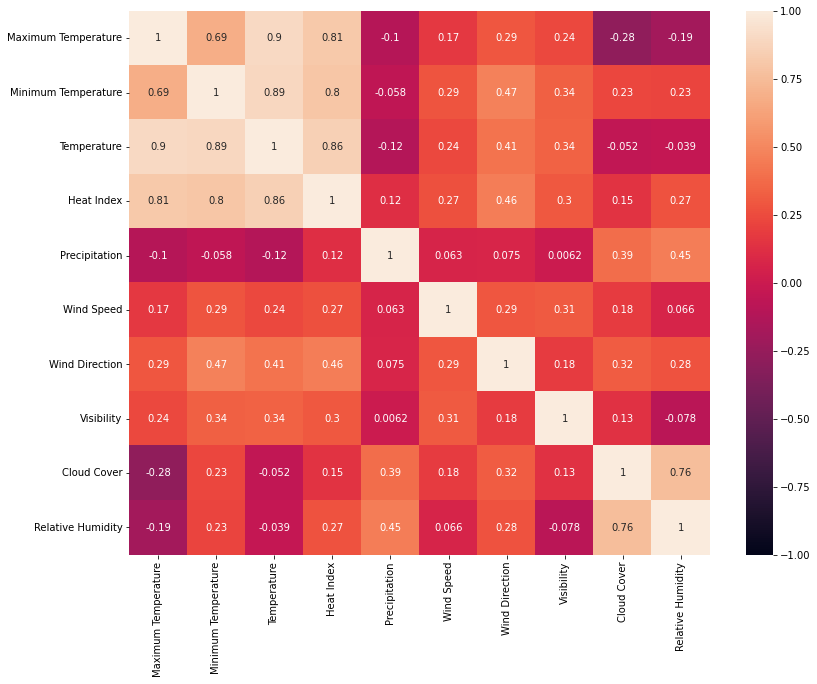

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

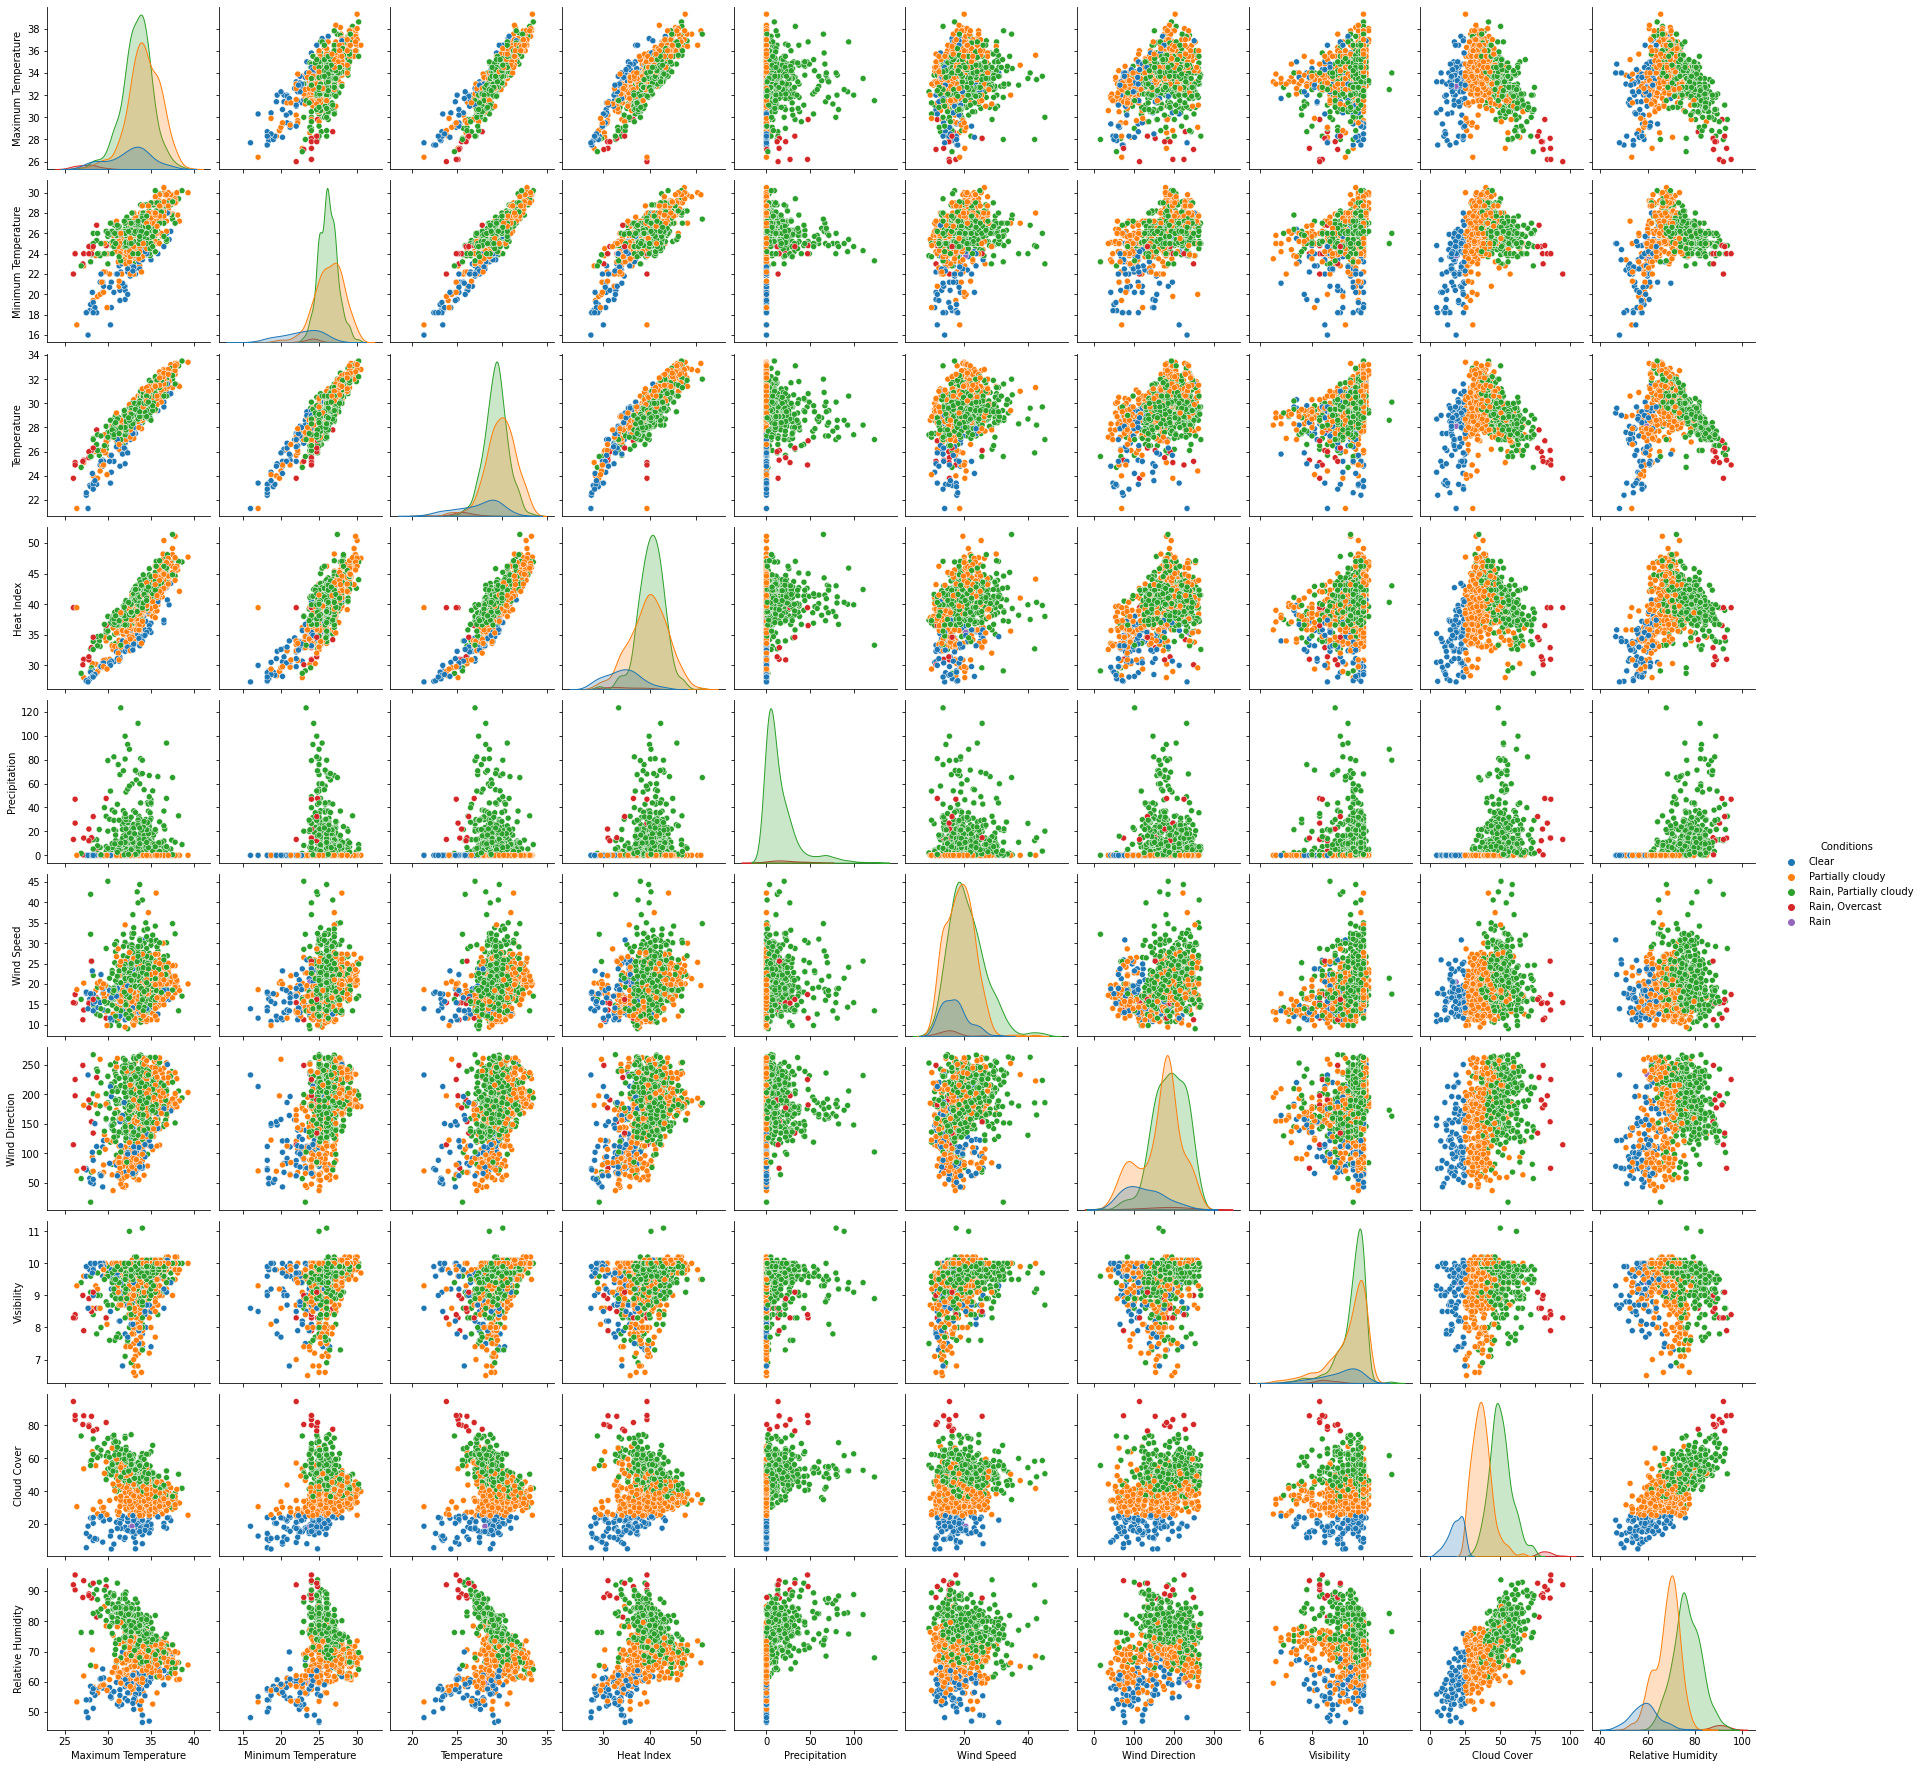

In [ ]:
sns.pairplot(df, hue='Conditions')

In [ ]:
df = df.rename(columns={"Maximum Temperature": "Maximum_Temperature", "Minimum Temperature": "Minimum_Temperature", "Heat Index": "Heat_Index", "Wind Speed": "Wind_Speed", "Wind Direction": "Wind_Direction", "Cloud Cover": "Cloud_Cover", "Relative Humidity": "Relative_Humidity"})

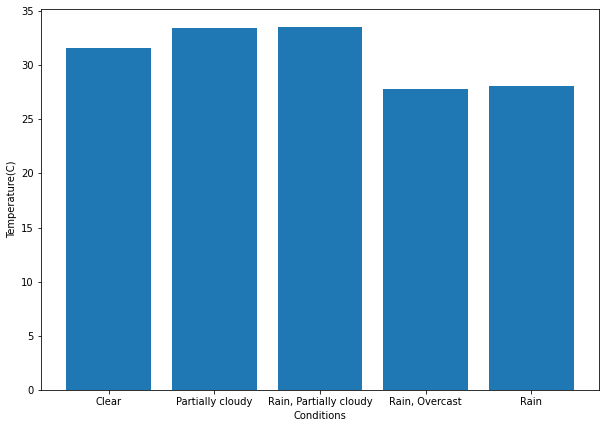

In [ ]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df['Conditions'], df['Temperature'])
plt.xlabel('Conditions')
plt.ylabel('Temperature(C)')
plt.show()

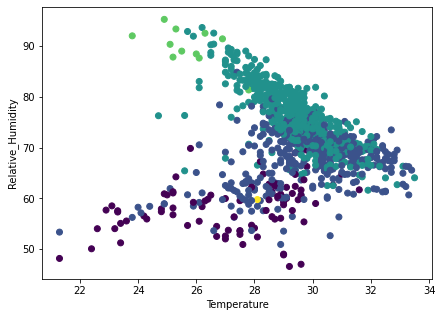

In [ ]:
df_cond_num = df.copy()
color = df_cond_num.Conditions.map({'Clear':0, 'Partially cloudy':1, 'Rain, Partially cloudy':2, 'Rain, Overcast':3, 'Rain':4})
fig = plt.figure(figsize =(7, 5))
plt.scatter(df_cond_num['Temperature'], df_cond_num['Relative_Humidity'], c=color)
plt.xlabel('Temperature')
plt.ylabel('Relative_Humidity')
plt.show()

In [ ]:
df.groupby(['Conditions']).size()

Conditions
Clear                      90
Partially cloudy          417
Rain                        1
Rain, Overcast             11
Rain, Partially cloudy    455
dtype: int64

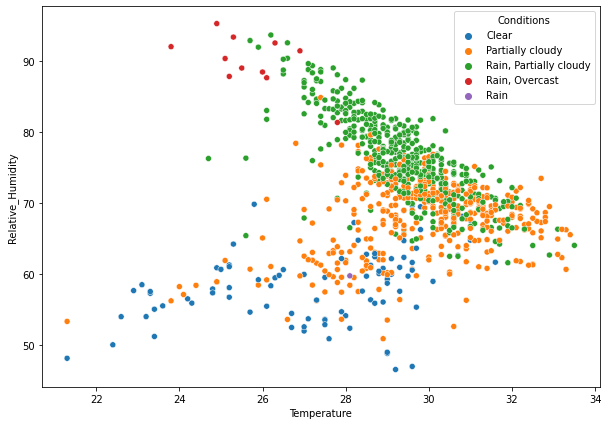

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="Temperature", y="Relative_Humidity", hue="Conditions")

###Build Model


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df

In [ ]:
X = df.iloc[:,4:12].values
y = df.iloc[:, 12].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 3. Build the models 
# Create an array of all ML Supervised Classification algorithms to be used
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
  # We set the random seed via the 'random_state' argument to a fixed number e.g. random_state=1.
  # This is to ensure that each algorithm is evaluated on the same splits of the training dataset.
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
 
  # We are using the metric of 'accuracy' to evaluate models.
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
 
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in 

LR: 0.804745 (0.021120)
LDA: 0.839931 (0.019472)
KNN: 0.826739 (0.016348)
CART: 0.997070 (0.003589)
NB: 0.957417 (0.025637)
SVM: 0.788547 (0.030979)


In [ ]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=4)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 24   3   0   0]
 [  1 117   0   1]
 [  0   0   5   0]
 [  0   8   1 133]]
                        precision    recall  f1-score   support

                 Clear       0.96      0.89      0.92        27
      Partially cloudy       0.91      0.98      0.95       119
        Rain, Overcast       0.83      1.00      0.91         5
Rain, Partially cloudy       0.99      0.94      0.96       142

              accuracy                           0.95       293
             macro avg       0.92      0.95      0.94       293
          weighted avg       0.95      0.95      0.95       293



In [ ]:
print("Test new example")
z_test = [[23.3, 28.4, 0.0, 15.2, 55.42, 9.8, 20.4, 57.56]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

z_test = [[26.5,	36.7,	39.83,	15.7,	137.25,	9.5,	69.0,	90.27]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

z_test = [[26.3,	34.6,	32.40,	16.2,	134.00,	9.1,	76.7,	92.56]]
z_test = scaler.transform(z_test)
z_pred = model.predict(z_test)
print(z_pred)

Test new example
['Clear']
['Rain, Partially cloudy']
['Rain, Overcast']


ที่อยากจะทำ : เราสามารถป้อน input เพื่อทำนายค่าสภาพอากาศในอนาคตโดยการใส่แค่ เดือน/วัน/ปี เท่านั้น

โดยอาจจะต้องเขียนวิธีการที่อ่าน เดือน/วัน/ปี ที่รับมาแล้วนำไปเปรียบเทียบกับ training set ที่มี เดือน/วัน/ปี ใกล้เคียงกัน 10 วันหริือเท่าไหร่ก็ได้ และนำ features attr. ทำหาค่า mean ของแต่ละ attr แล้วนำค่าเหล่านั้นไปเข้้าสู่ Model และ predict สภาพอากาศออกมา

- จะอ่านค่า เดือน/วัน/ปี ยังไง